In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | buala
Processing Record 3 of Set 1 | ossora
Processing Record 4 of Set 1 | aljezur
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | ancud
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | husavik
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | luderitz
Processing Record 11 of Set 1 | souillac
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | sabya
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | airai
Processing Record 16 of Set 1 | kashi
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | ingham
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | palmerston
Processing Record 2

Processing Record 41 of Set 4 | pekalongan
Processing Record 42 of Set 4 | esperance
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | batagay-alyta
Processing Record 45 of Set 4 | puerto del rosario
Processing Record 46 of Set 4 | hilo
Processing Record 47 of Set 4 | auki
Processing Record 48 of Set 4 | krasnoselkup
Processing Record 49 of Set 4 | paciran
Processing Record 50 of Set 4 | carahue
Processing Record 1 of Set 5 | otane
Processing Record 2 of Set 5 | butaritari
Processing Record 3 of Set 5 | namibe
Processing Record 4 of Set 5 | san policarpo
Processing Record 5 of Set 5 | kahului
Processing Record 6 of Set 5 | pemba
Processing Record 7 of Set 5 | kokuy
Processing Record 8 of Set 5 | trincomalee
Processing Record 9 of Set 5 | aswan
Processing Record 10 of Set 5 | lasa
Processing Record 11 of Set 5 | hami
Processing Record 12 of Set 5 | alice springs
Processing Record 13 of Set 5 | halalo
City not found. Skipping...
Processing Record 14 of Set 5 | sistran

Processing Record 29 of Set 8 | araouane
Processing Record 30 of Set 8 | lolua
City not found. Skipping...
Processing Record 31 of Set 8 | carauari
Processing Record 32 of Set 8 | saint-georges
Processing Record 33 of Set 8 | baruun-urt
Processing Record 34 of Set 8 | antofagasta
Processing Record 35 of Set 8 | tarudant
City not found. Skipping...
Processing Record 36 of Set 8 | dalvik
Processing Record 37 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 38 of Set 8 | fare
Processing Record 39 of Set 8 | maine-soroa
Processing Record 40 of Set 8 | ubinskoye
Processing Record 41 of Set 8 | lushunkou
City not found. Skipping...
Processing Record 42 of Set 8 | christchurch
Processing Record 43 of Set 8 | kamarai
Processing Record 44 of Set 8 | nokaneng
Processing Record 45 of Set 8 | tiksi
Processing Record 46 of Set 8 | dauphin
Processing Record 47 of Set 8 | dukat
Processing Record 48 of Set 8 | gimli
Processing Record 49 of Set 8 | juneau
Processing Record 50 of Se

Processing Record 18 of Set 12 | ler
Processing Record 19 of Set 12 | grootfontein
Processing Record 20 of Set 12 | tefe
Processing Record 21 of Set 12 | tojsici
Processing Record 22 of Set 12 | okha
Processing Record 23 of Set 12 | abha
Processing Record 24 of Set 12 | nizhniy kuranakh
Processing Record 25 of Set 12 | capreol
Processing Record 26 of Set 12 | strezhevoy
Processing Record 27 of Set 12 | mosquera
Processing Record 28 of Set 12 | yeppoon
Processing Record 29 of Set 12 | xinye
Processing Record 30 of Set 12 | zheshart
Processing Record 31 of Set 12 | bechem
Processing Record 32 of Set 12 | chara
Processing Record 33 of Set 12 | gangotri
City not found. Skipping...
Processing Record 34 of Set 12 | crab hill
City not found. Skipping...
Processing Record 35 of Set 12 | yunjinghong
City not found. Skipping...
Processing Record 36 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 37 of Set 12 | purranque
Processing Record 38 of Set 12 | taber
Processing Record 

In [11]:
len(city_data)

573

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.7911,-50.0119,72.32,89,98,6.24,BR,2021-01-30 18:17:33
1,Buala,-8.1450,159.5921,81.23,84,95,13.91,SB,2021-01-30 18:17:33
2,Ossora,59.2353,163.0719,4.21,93,100,28.03,RU,2021-01-30 18:17:33
3,Aljezur,37.3191,-8.8033,57.00,15,100,1.99,PT,2021-01-30 18:17:33
4,Port Alfred,-33.5906,26.8910,66.99,88,0,0.63,ZA,2021-01-30 18:17:34
5,Ancud,-41.8697,-73.8203,66.20,52,0,6.91,CL,2021-01-30 18:17:34
6,Ushuaia,-54.8000,-68.3000,53.60,58,20,27.63,AR,2021-01-30 18:15:05
7,Husavik,66.0449,-17.3389,19.40,58,90,5.75,IS,2021-01-30 18:17:34
8,Busselton,-33.6500,115.3333,66.00,68,0,3.00,AU,2021-01-30 18:13:56
9,Luderitz,-26.6481,15.1594,72.25,49,0,27.29,NA,2021-01-30 18:17:34


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Castro,BR,2021-01-30 18:17:33,-24.7911,-50.0119,72.32,89,98,6.24
1,Buala,SB,2021-01-30 18:17:33,-8.1450,159.5921,81.23,84,95,13.91
2,Ossora,RU,2021-01-30 18:17:33,59.2353,163.0719,4.21,93,100,28.03
3,Aljezur,PT,2021-01-30 18:17:33,37.3191,-8.8033,57.00,15,100,1.99
4,Port Alfred,ZA,2021-01-30 18:17:34,-33.5906,26.8910,66.99,88,0,0.63
5,Ancud,CL,2021-01-30 18:17:34,-41.8697,-73.8203,66.20,52,0,6.91
6,Ushuaia,AR,2021-01-30 18:15:05,-54.8000,-68.3000,53.60,58,20,27.63
7,Husavik,IS,2021-01-30 18:17:34,66.0449,-17.3389,19.40,58,90,5.75
8,Busselton,AU,2021-01-30 18:13:56,-33.6500,115.3333,66.00,68,0,3.00
9,Luderitz,NA,2021-01-30 18:17:34,-26.6481,15.1594,72.25,49,0,27.29


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

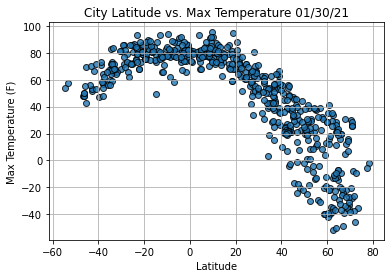

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

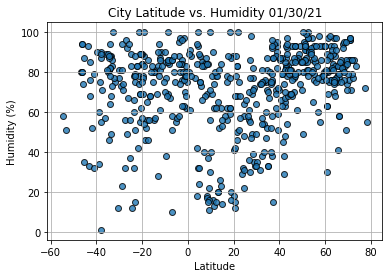

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

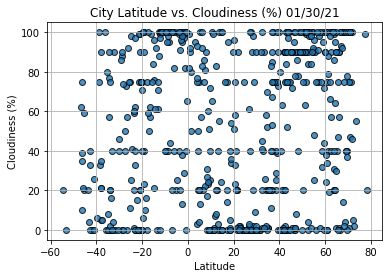

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

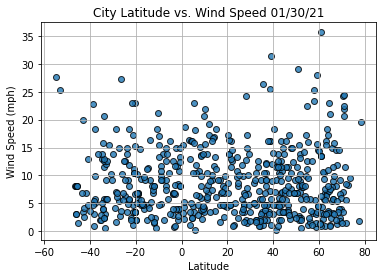

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()